# CIND 820 - Deliverable 3 - Model Evaluation
## Data Analysis Section

This section of the notebook aims to train and test 3 different supervised machine learning models on its performance with regard to predicting star-ratings based on user feedback. The notebook will be broken down into 3-main sections:

1. Data preparation

2. Model Training and Implementation

    1. Model Training for Logistic Regression Algorithm

    2. Model Training for a Naive Bayes Algorithm

    3. Model Training for a Support Vector Classifier Algorithm
    
3. Model Performance Evaluation 

## Version Note
- Version 2.4 adds Chi-Squared test to reduce dimensionality of the BoW matrix for model training

## Data Preparation

In [3]:
# Importing pandas library
import pandas as pd
import numpy as np

#MacOS Version of Filepath
# filepathMac = r"/Users/sszhang/Documents/Learning Data Analytics/TMU Certificate copy/CIND 820/Yelp Dataset/balancedDataBoW.csv"
filepathWindows = r"C:\Users\Sunora\iCloudDrive\Documents\Learning Data Analytics\TMU Certificate copy\CIND 820\Yelp Dataset\balancedDataBoW.csv"
data = pd.read_csv(filepathWindows)
data.head()

,review_id,user_id,business_id,stars,num_Tokens,neg,neu,pos,compound,aaron,...,yr,yuck,yum,yummy,yup,zero,zone,zoo,zucchini,étouffée
0,CoCim4CRm-WCoU-CFfWpLw,McdCFYocB1hFIiDQBRQ7YA,P_nqb7lULOtx3pAJbKfFXA,1,48,0.119,0.779,0.102,-0.0209,0,...,0,0,0,0,0,0,0,0,0,0
1,8s6Eejmy24XUhgNkR2uIUA,X67DbQdqHeZ-F2UVUOhn1g,WNjrsnJVPPnv_FtHHdjklA,1,84,0.110,0.819,0.071,-0.6697,0,...,0,0,0,0,0,0,0,0,0,0
2,2GdPCXF_5fR4_od5DJTD8Q,-VPeYf78MNJAB0iR7d9-zg,QboMIy08NLnBbLXEsmnDHg,1,27,0.276,0.690,0.034,-0.9612,0,...,0,0,0,0,0,0,0,0,0,0
3,vYSCzz-jM7ibdoIUCRLysw,I0Vt1g8iK0D_cxXkJyXb0A,INz7vujcHs0AggsV__pXYQ,1,6,0.222,0.778,0.000,-0.6449,0,...,0,0,0,0,0,0,0,0,0,0
4,mLokfOcquwIP57pcOkHBZQ,TV3p-bv5yh8RgdJ3WxM7Ug,eh8WfQqPa2ZWtbXe9_wHgQ,1,44,0.055,0.919,0.026,-0.3201,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Dropping 'review_id', 'user_id', 'business_id', 'neg', 'neu', and 'pos' fields
data.drop(columns=['review_id', 'user_id', 'business_id', 'neg', 'neu', 'pos'], inplace = True)
data.head()

,stars,num_Tokens,compound,aaron,aback,abandon,ability,able,absent,absolute,...,yr,yuck,yum,yummy,yup,zero,zone,zoo,zucchini,étouffée
0,1,48,-0.0209,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,84,-0.6697,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,27,-0.9612,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,6,-0.6449,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,44,-0.3201,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Feature Selection - Base (All Features)
We will start the model training and testing with the inclusion of all three engineered features: 1) The 4 different sentiment scores generated by VADER, 2) The token count, and 3) the Bag of Words matrix. The star rating will be the target variable. This will act as our baseline test for assessing model performance. The benefit of this approach is two-fold:

1. All the features being utilized were engineered and not intrinsic to the original dataset. As such, maintaining all the engineered features in the model training portion could help provide a solid baseline to compare each model's performance.

2. The feature selection process is often algorithm or model specific and as such could introduce variation in which features get preserved in the model training step. This too would skew the results when conducting a performance cross-comparison between all three models.   

### Training and Testing Setup
For the sake of consistency we will be training and testing all 3 models using the same methods:

- Utilize an 80% training size (equivalent to 20,000 rows of data)

- Utilize a 20% test size (equivalent to 5,000 rows of data)

### Model Training and Implementation

#### 1. Model Training for Logistic Regression Algorithm

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    confusion_matrix,
    classification_report
)
import time
import numpy as np

# Define target and features
Y_LR1 = data['stars']
X = data.drop(columns='stars')

# Initialize the model
model = LogisticRegression(max_iter=5000, solver='lbfgs')

# Time the cross-validation process
start_time = time.time()
y_predLR1 = cross_val_predict(model, X, Y_LR1, cv=10)
end_time = time.time()

# Print timing
print(f"10-fold CV prediction time: {end_time - start_time:.2f} seconds")

# Evaluate performance
print("Accuracy:", accuracy_score(Y_LR1, y_predLR1))
print("Mean Absolute Error:", mean_absolute_error(Y_LR1, y_predLR1))
print("Confusion Matrix:\n", confusion_matrix(Y_LR1, y_predLR1))
print("Classification Report:\n", classification_report(Y_LR1, y_predLR1))

10-fold CV prediction time: 5264.47 seconds
Accuracy: 0.5156
Mean Absolute Error: 0.62004
Confusion Matrix:
 [[3329 1184  318   93   76]
 [1262 2109 1176  296  157]
 [ 366 1122 2080 1049  383]
 [ 108  279  941 2154 1518]
 [  84  120  313 1265 3218]]
Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.67      0.66      5000
           2       0.44      0.42      0.43      5000
           3       0.43      0.42      0.42      5000
           4       0.44      0.43      0.44      5000
           5       0.60      0.64      0.62      5000

    accuracy                           0.52     25000
   macro avg       0.51      0.52      0.51     25000
weighted avg       0.51      0.52      0.51     25000



##### Prediction Error Distribution

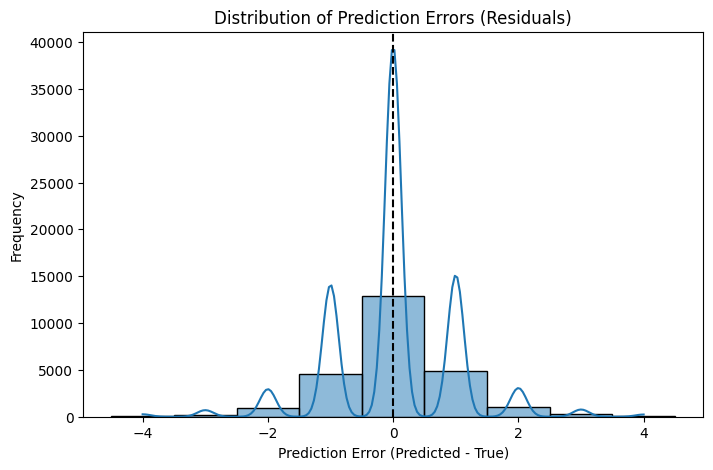

In [11]:
residuals = y_predLR1 - Y_LR1.values

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=np.arange(-4.5, 5, 1), kde=True)
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Prediction Error (Predicted - True)")
plt.ylabel("Frequency")
plt.axvline(0, color='black', linestyle='--')
plt.show()


#### Notes:
Based on the Confusion Matrix output for our **Logistic Regression model**, we quickly observe the following:

- **Precision**, a metric that measures how accurate a model is at categorizing star-ratings, was highest for 1-star and 5-star reviews but suffered between 2-4 star ratings. For instance, the model scored a 66% on precision for 1-star ratings which means that 66% of the model's predictions for 1-star ratings were truly 1-stars. In other words, it can be thought of as the probability of a model's prediction being correct. 

- **Recall**, a metric that measures how complete a model is at capturing the right star-ratings, was also highest for 1-star and 5-star reviews and also suffered between 2-4 star ratings. For instance, the model scored a 66% on recall for 1-star ratings which means that 66% of all 1-star ratings were identified.  

- **F1-Score**, a harmonized metric that takes the average of the **precision** and **recall** score, is therefore also aligned in that both 1-star and 5-star categories had the highest score. 

- **Accuracy**, a metric that measures the overall correctness of a model across all categories, was 52%, indicating that the model correctly predicted just over half of all reviews. While this is better than random guessing (which would yield ~20% in a 5-class setup), it still reflects substantial room for improvement.


#### 2. Model Training for Naive Bayes Algorithm

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    confusion_matrix,
    classification_report
)
import time

# Shift compound score to be non-negative for Naive Bayes
data_nb = data.copy()
data_nb['compound'] = data_nb['compound'] + 1

# Define target and features
Y_NB1 = data_nb['stars']
X = data_nb.drop(columns='stars')

# Initialize model
nb_model = MultinomialNB()

# Time the cross-validation prediction process
start_time = time.time()
y_predNB1 = cross_val_predict(nb_model, X, Y_NB1, cv=10)
end_time = time.time()

# Print timing
print(f"10-fold CV prediction time: {end_time - start_time:.2f} seconds")

# Evaluate model
print("Accuracy:", accuracy_score(Y_NB1, y_predNB1))
print("Mean Absolute Error:", mean_absolute_error(Y_NB1, y_predNB1))
print("Confusion Matrix:\n", confusion_matrix(Y_NB1, y_predNB1))
print("Classification Report:\n", classification_report(Y_NB1, y_predNB1))

10-fold CV prediction time: 6.82 seconds
Accuracy: 0.51916
Mean Absolute Error: 0.63552
Confusion Matrix:
 [[3291 1267  313   56   73]
 [1165 1921 1445  327  142]
 [ 438  810 2128 1310  314]
 [ 228  170  790 2673 1139]
 [ 291   80  201 1462 2966]]
Classification Report:
               precision    recall  f1-score   support

           1       0.61      0.66      0.63      5000
           2       0.45      0.38      0.42      5000
           3       0.44      0.43      0.43      5000
           4       0.46      0.53      0.49      5000
           5       0.64      0.59      0.62      5000

    accuracy                           0.52     25000
   macro avg       0.52      0.52      0.52     25000
weighted avg       0.52      0.52      0.52     25000



##### Prediction Error Distribution

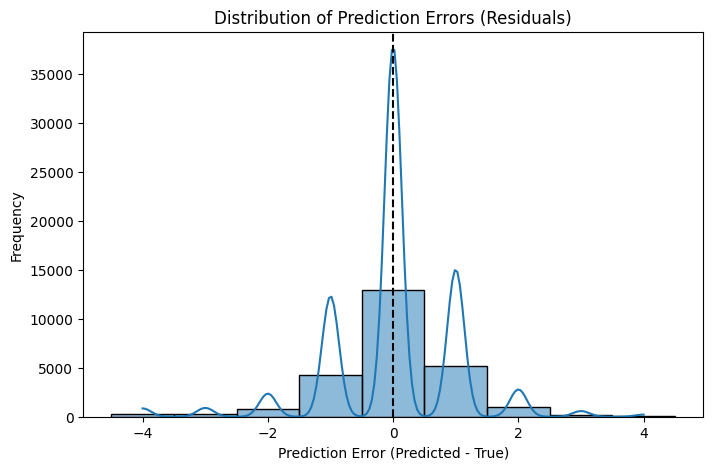

In [14]:
residuals = y_predNB1 - Y_NB1.values

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=np.arange(-4.5, 5, 1), kde=True)
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Prediction Error (Predicted - True)")
plt.ylabel("Frequency")
plt.axvline(0, color='black', linestyle='--')
plt.show()


#### Notes:
Based on the Confusion Matrix output for our **Naive Bayes model**, we quickly observe the following:

- **Precision**, a metric that measures how accurate a model is at categorizing star-ratings, was highest for 1-star and 5-star reviews but suffered between 2-4 star ratings. For instance, the model scored a 63% on precision for 1-star ratings which means that 63% of the model's predictions for 1-star ratings were truly 1-stars. In other words, it can be thought of as the probability of a model's prediction being correct. 

- **Recall**, a metric that measures how complete a model is at capturing the right star-ratings, was also highest for 1-star and 5-star reviews and also suffered between 2-4 star ratings. For instance, the model scored a 67% on recall for 1-star ratings which means that 67% of all 1-star ratings were identified.  

- **F1-Score**, a harmonized metric that takes the average of the **precision** and **recall** score, is therefore also aligned in that both 1-star and 5-star categories had the highest score. 

- **Accuracy**, a metric that measures the overall correctness of a model across all categories, was 52%, indicating that the model correctly predicted just over half of all reviews. While this is better than random guessing (which would yield ~20% in a 5-class setup), it still reflects substantial room for improvement.


#### 3. Model Training for Support Vector Machine (Classifier) Algorithm

In [15]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    confusion_matrix,
    classification_report
)
import time

# Define target and features
Y_SVC1 = data['stars']
X = data.drop(columns='stars')

# Feature scaling
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X)

# Initialize model
svc_model = LinearSVC()

# Time the cross-validation prediction process
start_time = time.time()
y_predSVC1 = cross_val_predict(svc_model, X_scaled, Y_SVC1, cv=10)
end_time = time.time()

# Print timing
print(f"10-fold CV prediction time: {end_time - start_time:.2f} seconds")

# Evaluate model
print("Accuracy:", accuracy_score(Y_SVC1, y_predSVC1))
print("Mean Absolute Error:", mean_absolute_error(Y_SVC1, y_predSVC1))
print("Confusion Matrix:\n", confusion_matrix(Y_SVC1, y_predSVC1))
print("Classification Report:\n", classification_report(Y_SVC1, y_predSVC1))

10-fold CV prediction time: 14.75 seconds
Accuracy: 0.50512
Mean Absolute Error: 0.66216
Confusion Matrix:
 [[3449  993  319  125  114]
 [1381 1936 1103  359  221]
 [ 453 1147 1875 1049  476]
 [ 147  317  902 2027 1607]
 [ 125  126  303 1105 3341]]
Classification Report:
               precision    recall  f1-score   support

           1       0.62      0.69      0.65      5000
           2       0.43      0.39      0.41      5000
           3       0.42      0.38      0.39      5000
           4       0.43      0.41      0.42      5000
           5       0.58      0.67      0.62      5000

    accuracy                           0.51     25000
   macro avg       0.50      0.51      0.50     25000
weighted avg       0.50      0.51      0.50     25000



##### Prediction Distribution

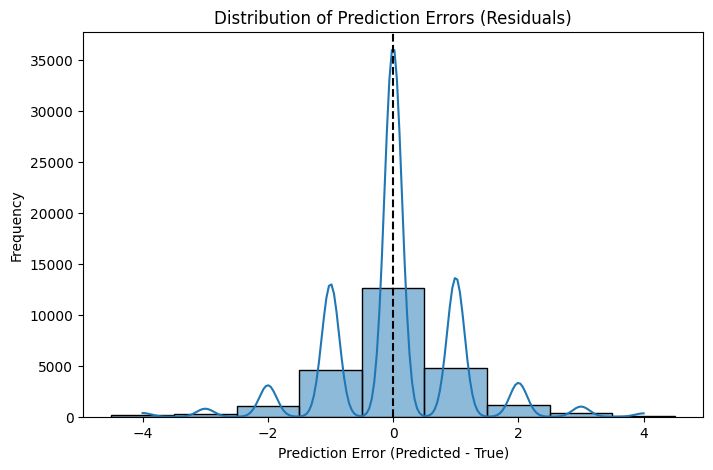

In [16]:
residuals = y_predSVC1 - Y_SVC1.values

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=np.arange(-4.5, 5, 1), kde=True)
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Prediction Error (Predicted - True)")
plt.ylabel("Frequency")
plt.axvline(0, color='black', linestyle='--')
plt.show()


## Key Results and Takeaways

- The Naive Bayes and Multinomial Logistic Regression models performed equivalently whilst the Support Vector Regression model lagged behind

- The Naive Bayes model had the quickest run-time suggesting computational efficiency, while the two regression models were more time-consuming

- Even with 10,000 iterations, the Support Vector Regression failed to converge whilst the Multinomial Logistic Regression model was able to converge with a 5,000 iteration limit  

- Overall, all models performed poorly and would require performance tuning. 


## Next Steps

- Implement feature selection to reduce the dimensionality of the dataset and to remove highly correlated features in efforts to reduce noise. This may help with performance tuning of the models

- One viable tool for dimensionality reduction would be to conduct a Chi-squared test on the BoW Matrix setting the 'Stars' column as the target variable. This could help in determine which tokenized words are most influential in determining the star-rating. This would be a next-step and could be as a universal feature selection method applicable for all 3 models.


## Feature Selection - Compound VADER Scores + Token Count
This iteration of model training and testing will remove all features in the Bag of Words matrix leave only the Token Count and the Compound VADER score.

#### 1. Model Training for Logistic Regression Algorithm

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    confusion_matrix,
    classification_report
)
import time
import numpy as np

# Define target and features
Y_LR2 = data['stars']
X = data[['compound', 'num_Tokens']] # Feature Set

# Initialize the model
model = LogisticRegression(max_iter=5000, solver='lbfgs')

# Time the cross-validation process
start_time = time.time()
y_predLR2 = cross_val_predict(model, X, Y_LR2, cv=10)
end_time = time.time()

# Print timing
print(f"10-fold CV prediction time: {end_time - start_time:.2f} seconds")

# Evaluate performance
print("Accuracy:", accuracy_score(Y_LR2, y_predLR2))
print("Mean Absolute Error:", mean_absolute_error(Y_LR2, y_predLR2))
print("Confusion Matrix:\n", confusion_matrix(Y_LR2, y_predLR2))
print("Classification Report:\n", classification_report(Y_LR2, y_predLR2))

10-fold CV prediction time: 6.47 seconds
Accuracy: 0.38748
Mean Absolute Error: 0.92644
Confusion Matrix:
 [[3156  611  687  300  246]
 [1754  690 1092  721  743]
 [ 610  473 1041 1206 1670]
 [ 150  165  668 1155 2862]
 [  84  115  389  767 3645]]
Classification Report:
               precision    recall  f1-score   support

           1       0.55      0.63      0.59      5000
           2       0.34      0.14      0.20      5000
           3       0.27      0.21      0.23      5000
           4       0.28      0.23      0.25      5000
           5       0.40      0.73      0.51      5000

    accuracy                           0.39     25000
   macro avg       0.37      0.39      0.36     25000
weighted avg       0.37      0.39      0.36     25000



##### Prediction Error Distribution

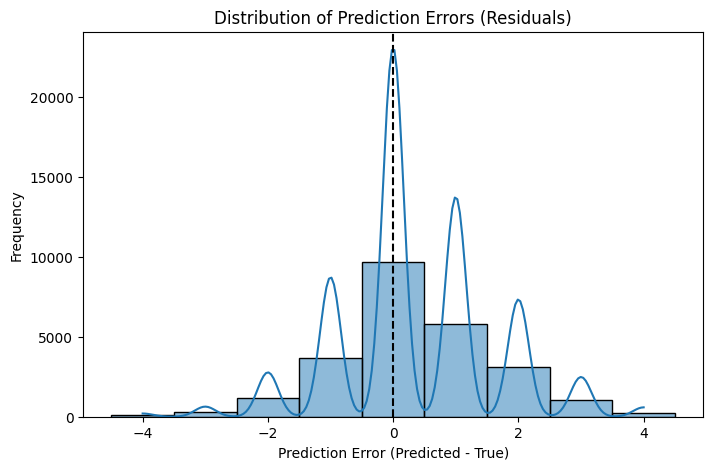

In [13]:
residuals = y_predLR2 - Y_LR2.values

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=np.arange(-4.5, 5, 1), kde=True)
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Prediction Error (Predicted - True)")
plt.ylabel("Frequency")
plt.axvline(0, color='black', linestyle='--')
plt.show()


#### 2. Model Training for Naive Bayes Algorithm

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    confusion_matrix,
    classification_report
)
import time

# Shift compound score to be non-negative for Naive Bayes
data_nb = data.copy()
data_nb['compound'] = data_nb['compound'] + 1

# Define target and features
Y_NB2 = data_nb['stars']
X = data_nb[['compound', 'num_Tokens']] 

# Initialize model
nb_model = MultinomialNB()

# Time the cross-validation prediction process
start_time = time.time()
y_predNB2 = cross_val_predict(nb_model, X, Y_NB2, cv=10)
end_time = time.time()

# Print timing
print(f"10-fold CV prediction time: {end_time - start_time:.2f} seconds")

# Evaluate model
print("Accuracy:", accuracy_score(Y_NB2, y_predNB2))
print("Mean Absolute Error:", mean_absolute_error(Y_NB2, y_predNB2))
print("Confusion Matrix:\n", confusion_matrix(Y_NB2, y_predNB2))
print("Classification Report:\n", classification_report(Y_NB2, y_predNB2))

10-fold CV prediction time: 0.03 seconds
Accuracy: 0.32676
Mean Absolute Error: 1.23084
Confusion Matrix:
 [[2754  551  390  372  933]
 [1692  654  594  511 1549]
 [ 891  667  613  616 2213]
 [ 475  537  530  583 2875]
 [ 255  333  376  471 3565]]
Classification Report:
               precision    recall  f1-score   support

           1       0.45      0.55      0.50      5000
           2       0.24      0.13      0.17      5000
           3       0.24      0.12      0.16      5000
           4       0.23      0.12      0.15      5000
           5       0.32      0.71      0.44      5000

    accuracy                           0.33     25000
   macro avg       0.30      0.33      0.29     25000
weighted avg       0.30      0.33      0.29     25000



##### Prediction Error Distribution

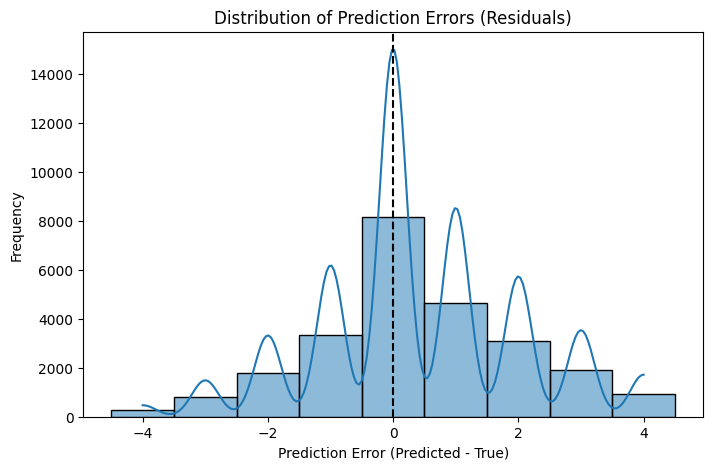

In [16]:
residuals = y_predNB2 - Y_NB2.values

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=np.arange(-4.5, 5, 1), kde=True)
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Prediction Error (Predicted - True)")
plt.ylabel("Frequency")
plt.axvline(0, color='black', linestyle='--')
plt.show()


#### 3. Model Training for Support Vector Classification Algorithm

In [20]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    confusion_matrix,
    classification_report
)
import time

# Define target and features
Y_SVC2 = data['stars']
X = data[['compound', 'num_Tokens']] # Feature Set

# Feature scaling
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X)

# Initialize model
svc_model = LinearSVC()

# Time the cross-validation prediction process
start_time = time.time()
y_predSVC2 = cross_val_predict(svc_model, X_scaled, Y_SVC2, cv=10)
end_time = time.time()

# Print timing
print(f"10-fold CV prediction time: {end_time - start_time:.2f} seconds")

# Evaluate model
print("Accuracy:", accuracy_score(Y_SVC2, y_predSVC2))
print("Mean Absolute Error:", mean_absolute_error(Y_SVC2, y_predSVC2))
print("Confusion Matrix:\n", confusion_matrix(Y_SVC2, y_predSVC2))
print("Classification Report:\n", classification_report(Y_SVC2, y_predSVC2))

10-fold CV prediction time: 0.11 seconds
Accuracy: 0.36836
Mean Absolute Error: 1.063
Confusion Matrix:
 [[3754   30  315  399  502]
 [2450   24  473  834 1219]
 [1104   15  483 1048 2350]
 [ 325    4  344  908 3419]
 [ 197    3  188  572 4040]]
Classification Report:
               precision    recall  f1-score   support

           1       0.48      0.75      0.59      5000
           2       0.32      0.00      0.01      5000
           3       0.27      0.10      0.14      5000
           4       0.24      0.18      0.21      5000
           5       0.35      0.81      0.49      5000

    accuracy                           0.37     25000
   macro avg       0.33      0.37      0.29     25000
weighted avg       0.33      0.37      0.29     25000



##### Prediction Error Distribution

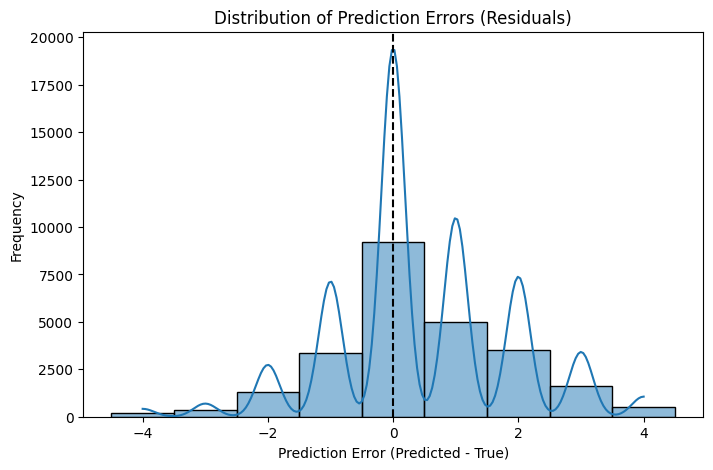

In [21]:
residuals = y_predSVC2 - Y_SVC2.values

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=np.arange(-4.5, 5, 1), kde=True)
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Prediction Error (Predicted - True)")
plt.ylabel("Frequency")
plt.axvline(0, color='black', linestyle='--')
plt.show()


## Feature Selection - Bag-of-Words Matrix Only
This iteration of model training and testing will remove all engineered features leaving only the Bag of Words matrix.

#### 1. Model Training for Logistic Regression Algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    confusion_matrix,
    classification_report
)
import time
import numpy as np

# Define target and features
Y_LR3 = data['stars']
X = data.drop(columns = ['stars', 'compound', 'num_Tokens'])

# Initialize the model
model = LogisticRegression(max_iter=5000, solver='lbfgs')

# Time the cross-validation process
start_time = time.time()
y_predLR3 = cross_val_predict(model, X, Y_LR3, cv=10)
end_time = time.time()

# Print timing
print(f"10-fold CV prediction time: {end_time - start_time:.2f} seconds")

# Evaluate performance
print("Accuracy:", accuracy_score(Y_LR3, y_predLR3))
print("Mean Absolute Error:", mean_absolute_error(Y_LR3, y_predLR3))
print("Confusion Matrix:\n", confusion_matrix(Y_LR3, y_predLR3))
print("Classification Report:\n", classification_report(Y_LR3, y_predLR3))

10-fold CV prediction time: 343.87 seconds
Accuracy: 0.51148
Mean Absolute Error: 0.63588
Confusion Matrix:
 [[3316 1157  323  106   98]
 [1246 2110 1150  313  181]
 [ 379 1143 2045 1033  400]
 [ 116  296  969 2131 1488]
 [  88  144  321 1262 3185]]
Classification Report:
               precision    recall  f1-score   support

           1       0.64      0.66      0.65      5000
           2       0.44      0.42      0.43      5000
           3       0.43      0.41      0.42      5000
           4       0.44      0.43      0.43      5000
           5       0.60      0.64      0.62      5000

    accuracy                           0.51     25000
   macro avg       0.51      0.51      0.51     25000
weighted avg       0.51      0.51      0.51     25000



##### Prediction Error Distribution

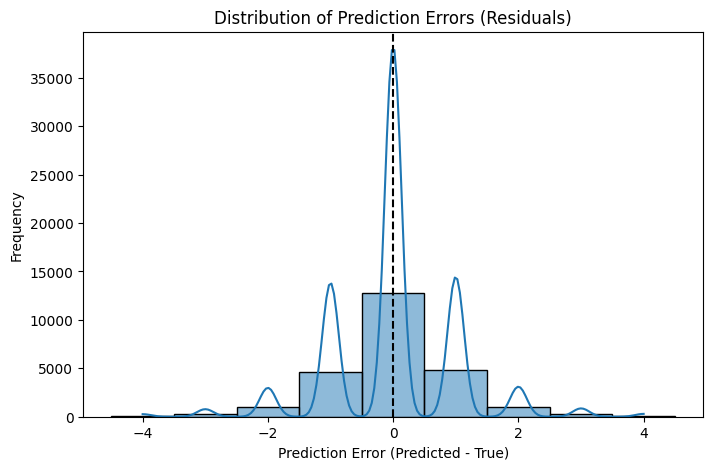

In [23]:
residuals = y_predLR3 - Y_LR3.values

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=np.arange(-4.5, 5, 1), kde=True)
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Prediction Error (Predicted - True)")
plt.ylabel("Frequency")
plt.axvline(0, color='black', linestyle='--')
plt.show()


#### 2. Model Training for Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    confusion_matrix,
    classification_report
)
import time

# Define target and features
Y_NB3 = data['stars']
X = data.drop(columns = ['stars', 'compound', 'num_Tokens'])

# Initialize model
nb_model = MultinomialNB()

# Time the cross-validation prediction process
start_time = time.time()
y_predNB3 = cross_val_predict(nb_model, X, Y_NB3, cv=10)
end_time = time.time()

# Print timing
print(f"10-fold CV prediction time: {end_time - start_time:.2f} seconds")

# Evaluate model
print("Accuracy:", accuracy_score(Y_NB3, y_predNB3))
print("Mean Absolute Error:", mean_absolute_error(Y_NB3, y_predNB3))
print("Confusion Matrix:\n", confusion_matrix(Y_NB3, y_predNB3))
print("Classification Report:\n", classification_report(Y_NB3, y_predNB3))

10-fold CV prediction time: 5.93 seconds
Accuracy: 0.5166
Mean Absolute Error: 0.64368
Confusion Matrix:
 [[3318 1260  309   47   66]
 [1198 1938 1422  321  121]
 [ 456  839 2165 1269  271]
 [ 247  188  840 2690 1035]
 [ 341   89  233 1533 2804]]
Classification Report:
               precision    recall  f1-score   support

           1       0.60      0.66      0.63      5000
           2       0.45      0.39      0.42      5000
           3       0.44      0.43      0.43      5000
           4       0.46      0.54      0.50      5000
           5       0.65      0.56      0.60      5000

    accuracy                           0.52     25000
   macro avg       0.52      0.52      0.52     25000
weighted avg       0.52      0.52      0.52     25000



##### Prediction Error Distribution

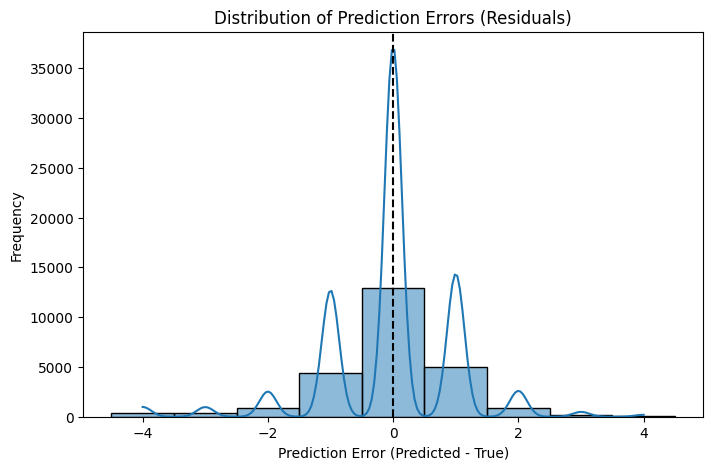

In [25]:
residuals = y_predNB3 - Y_NB3.values

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=np.arange(-4.5, 5, 1), kde=True)
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Prediction Error (Predicted - True)")
plt.ylabel("Frequency")
plt.axvline(0, color='black', linestyle='--')
plt.show()


#### 3. Model Training for Support Vector Classifier Algorithm

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    confusion_matrix,
    classification_report
)
import time

# Define target and features
Y_SVC3 = data['stars']
X = data.drop(columns = ['stars', 'compound', 'num_Tokens'])

# Feature scaling
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X)

# Initialize model
svc_model = LinearSVC()

# Time the cross-validation prediction process
start_time = time.time()
y_predSVC3 = cross_val_predict(svc_model, X_scaled, Y_SVC3, cv=10)
end_time = time.time()

# Print timing
print(f"10-fold CV prediction time: {end_time - start_time:.2f} seconds")

# Evaluate model
print("Accuracy:", accuracy_score(Y_SVC3, y_predSVC3))
print("Mean Absolute Error:", mean_absolute_error(Y_SVC3, y_predSVC3))
print("Confusion Matrix:\n", confusion_matrix(Y_SVC3, y_predSVC3))
print("Classification Report:\n", classification_report(Y_SVC3, y_predSVC3))

10-fold CV prediction time: 15.50 seconds
Accuracy: 0.50076
Mean Absolute Error: 0.67804
Confusion Matrix:
 [[3408  992  314  142  144]
 [1340 1921 1109  392  238]
 [ 445 1176 1868 1042  469]
 [ 153  352  919 2001 1575]
 [ 134  141  316 1088 3321]]
Classification Report:
               precision    recall  f1-score   support

           1       0.62      0.68      0.65      5000
           2       0.42      0.38      0.40      5000
           3       0.41      0.37      0.39      5000
           4       0.43      0.40      0.41      5000
           5       0.58      0.66      0.62      5000

    accuracy                           0.50     25000
   macro avg       0.49      0.50      0.50     25000
weighted avg       0.49      0.50      0.50     25000



##### Prediction Error Distribution

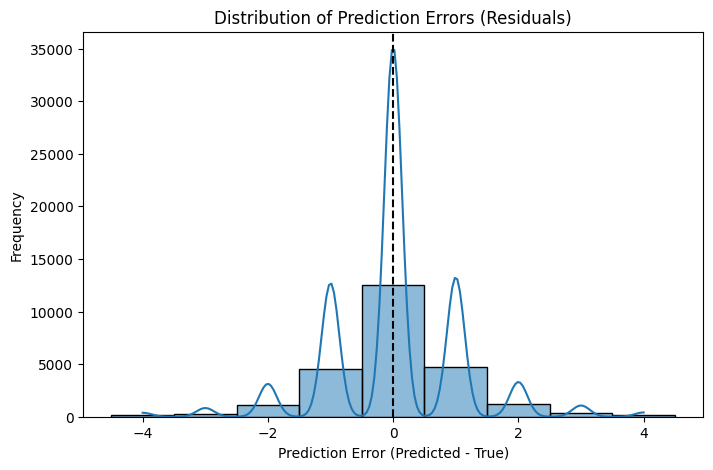

In [27]:
residuals = y_predSVC3 - Y_SVC3.values

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=np.arange(-4.5, 5, 1), kde=True)
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Prediction Error (Predicted - True)")
plt.ylabel("Frequency")
plt.axvline(0, color='black', linestyle='--')
plt.show()


## Feature Selection - Chi-Squred BoW Dimension Reduction + VADER Compound + Token Count

#### Conducting Chi-Squared to Reduce BoW Matrix Features

In [17]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd
import numpy as np

# Separating BoW matrix from the rest of the dataset
X_bow = data.iloc[:, 3:]  # BoW features
X_others = data.iloc[:, 0:3]  # VADER scores + token count + stars
Y = data['stars']  # Target variable

# Apply Chi-Squared feature selection to select top k features
chi2_selector = SelectKBest(chi2, k= 500) # Number of top features to select
X_bow_selected = chi2_selector.fit_transform(X_bow, Y) # Fit and transform the BoW features

# Get original column names for X_other
other_feature_names = X_others.columns.tolist()

# Get selected feature names from chi2_selector
selected_feature_names = X_bow.columns[chi2_selector.get_support()].tolist()

# Combine both sets of feature names
final_feature_names = other_feature_names + selected_feature_names

# Combine the feature matrices
X_final = np.hstack((X_others.values, X_bow_selected))

# Create the DataFrame with proper column names
X_final_df = pd.DataFrame(X_final, columns=final_feature_names)

# Display the first few rows of the final DataFrame
X_final_df.head()   

,stars,num_Tokens,compound,absolutely,account,acknowledge,act,actually,address,alignment,...,wonderful,word,work,write,wrong,year,yell,yum,yummy,zero
0,1.0,48.0,-0.0209,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,84.0,-0.6697,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,27.0,-0.9612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,6.0,-0.6449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,44.0,-0.3201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 1. Model Training for Logistic Regression Algorithm

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    confusion_matrix,
    classification_report
)
import time
import numpy as np

# Define target and features
Y_LR4 = X_final_df['stars']
X = X_final_df.drop(columns = ['stars'])

# Initialize the model
model = LogisticRegression(max_iter=5000, solver='lbfgs')

# Time the cross-validation process
start_time = time.time()
y_predLR4 = cross_val_predict(model, X, Y_LR4, cv=10)
end_time = time.time()

# Print timing
print(f"10-fold CV prediction time: {end_time - start_time:.2f} seconds")

# Evaluate performance
print("Accuracy:", accuracy_score(Y_LR4, y_predLR4))
print("Mean Absolute Error:", mean_absolute_error(Y_LR4, y_predLR4))
print("Confusion Matrix:\n", confusion_matrix(Y_LR4, y_predLR4))
print("Classification Report:\n", classification_report(Y_LR4, y_predLR4))

10-fold CV prediction time: 447.56 seconds
Accuracy: 0.54764
Mean Absolute Error: 0.57808
Confusion Matrix:
 [[3640  971  208   74  107]
 [1337 2118 1098  247  200]
 [ 352 1042 2092 1092  422]
 [  95  188  827 2269 1621]
 [  86   84  241 1017 3572]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.66      0.73      0.69      5000
         2.0       0.48      0.42      0.45      5000
         3.0       0.47      0.42      0.44      5000
         4.0       0.48      0.45      0.47      5000
         5.0       0.60      0.71      0.65      5000

    accuracy                           0.55     25000
   macro avg       0.54      0.55      0.54     25000
weighted avg       0.54      0.55      0.54     25000



##### Prediction Error Distribution

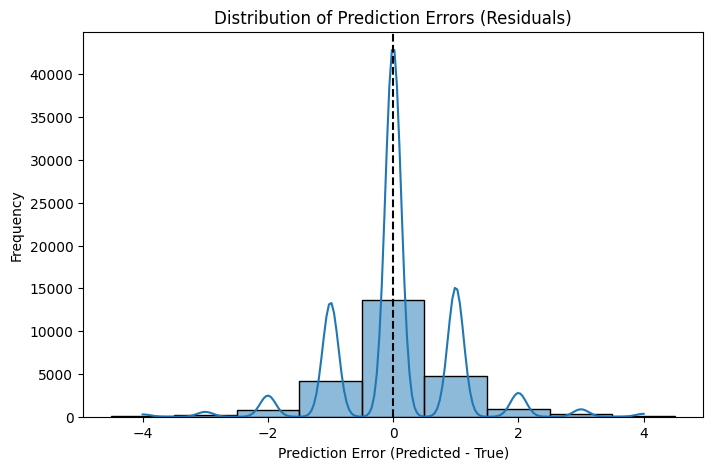

In [19]:
residuals = y_predLR4 - Y_LR4.values

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=np.arange(-4.5, 5, 1), kde=True)
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Prediction Error (Predicted - True)")
plt.ylabel("Frequency")
plt.axvline(0, color='black', linestyle='--')
plt.show()


#### 2. Model Training for Naive Bayes Algorithm

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    confusion_matrix,
    classification_report
)
import time

# Shift compound score to be non-negative for Naive Bayes
data_nb = X_final_df.copy() # Using the final feature DataFrame where BoW were reduced by Chi2
data_nb['compound'] = X_final_df['compound'] + 1

# Define target and features
Y_NB4 = data_nb['stars']
X = data_nb.drop(columns = ['stars'])

# Initialize model
nb_model = MultinomialNB()

# Time the cross-validation prediction process
start_time = time.time()
y_predNB4 = cross_val_predict(nb_model, X, Y_NB4, cv=10)
end_time = time.time()

# Print timing
print(f"10-fold CV prediction time: {end_time - start_time:.2f} seconds")

# Evaluate model
print("Accuracy:", accuracy_score(Y_NB4, y_predNB4))
print("Mean Absolute Error:", mean_absolute_error(Y_NB4, y_predNB4))
print("Confusion Matrix:\n", confusion_matrix(Y_NB4, y_predNB4))
print("Classification Report:\n", classification_report(Y_NB4, y_predNB4))

10-fold CV prediction time: 0.59 seconds
Accuracy: 0.52104
Mean Absolute Error: 0.64168
Confusion Matrix:
 [[3307 1207  308   90   88]
 [1139 1814 1503  323  221]
 [ 387  768 2198 1227  420]
 [ 203  192  735 2486 1384]
 [ 261   79  205 1234 3221]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.62      0.66      0.64      5000
         2.0       0.45      0.36      0.40      5000
         3.0       0.44      0.44      0.44      5000
         4.0       0.46      0.50      0.48      5000
         5.0       0.60      0.64      0.62      5000

    accuracy                           0.52     25000
   macro avg       0.52      0.52      0.52     25000
weighted avg       0.52      0.52      0.52     25000



##### Prediction Error Distribution

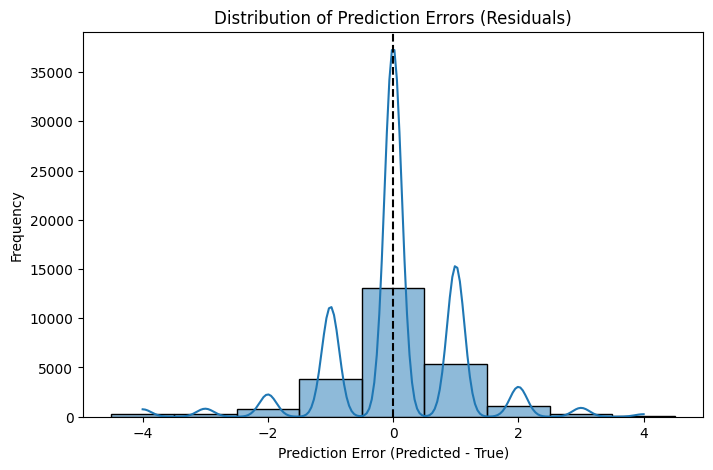

In [21]:
residuals = y_predNB4 - Y_NB4.values

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=np.arange(-4.5, 5, 1), kde=True)
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Prediction Error (Predicted - True)")
plt.ylabel("Frequency")
plt.axvline(0, color='black', linestyle='--')
plt.show()


#### 3. Model Training for Support Vector Classifier Algorithm

In [22]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    confusion_matrix,
    classification_report
)
import time

# Define target and features
Y_SVC4 = X_final_df['stars']
X = X_final_df.drop(columns = ['stars'])

# Feature scaling
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X)

# Initialize model
svc_model = LinearSVC()

# Time the cross-validation prediction process
start_time = time.time()
y_predSVC4 = cross_val_predict(svc_model, X_scaled, Y_SVC4, cv=10)
end_time = time.time()

# Print timing
print(f"10-fold CV prediction time: {end_time - start_time:.2f} seconds")

# Evaluate model
print("Accuracy:", accuracy_score(Y_SVC4, y_predSVC4))
print("Mean Absolute Error:", mean_absolute_error(Y_SVC4, y_predSVC4))
print("Confusion Matrix:\n", confusion_matrix(Y_SVC4, y_predSVC4))
print("Classification Report:\n", classification_report(Y_SVC4, y_predSVC4))

10-fold CV prediction time: 3.40 seconds
Accuracy: 0.535
Mean Absolute Error: 0.62312
Confusion Matrix:
 [[3902  726  140   75  157]
 [1684 1795  933  289  299]
 [ 544  945 1815 1102  594]
 [ 165  178  699 2045 1913]
 [ 131   58  150  843 3818]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.61      0.78      0.68      5000
         2.0       0.48      0.36      0.41      5000
         3.0       0.49      0.36      0.42      5000
         4.0       0.47      0.41      0.44      5000
         5.0       0.56      0.76      0.65      5000

    accuracy                           0.54     25000
   macro avg       0.52      0.53      0.52     25000
weighted avg       0.52      0.54      0.52     25000



##### Prediction Error Distribution

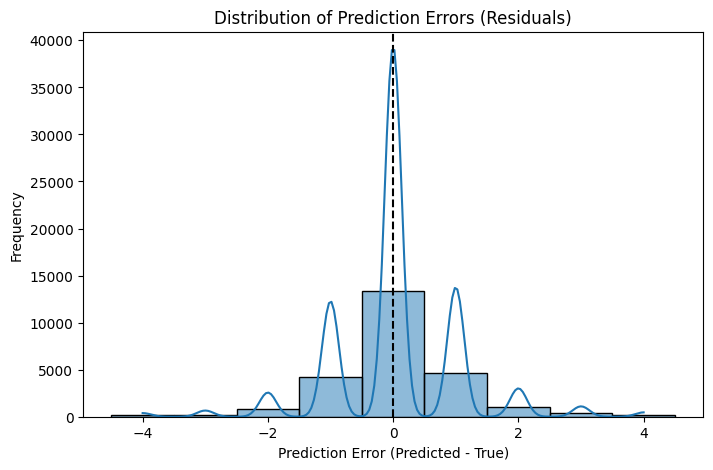

In [23]:
residuals = y_predSVC4 - Y_SVC4.values

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=np.arange(-4.5, 5, 1), kde=True)
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Prediction Error (Predicted - True)")
plt.ylabel("Frequency")
plt.axvline(0, color='black', linestyle='--')
plt.show()
